#Numpy, Matplotlib, and Pandas... Oh My!

#Matplotlib (Plotting)

In [1]:
!ls

Untitled.ipynb       data                 hello.py             pandas-extra.ipynb   saved_data.csv
Untitled1.ipynb      exercise.md          linear_algebra.ipynb pandas.ipynb


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
x = np.linspace(0,10,100)
x

array([  0.        ,   0.1010101 ,   0.2020202 ,   0.3030303 ,
         0.4040404 ,   0.50505051,   0.60606061,   0.70707071,
         0.80808081,   0.90909091,   1.01010101,   1.11111111,
         1.21212121,   1.31313131,   1.41414141,   1.51515152,
         1.61616162,   1.71717172,   1.81818182,   1.91919192,
         2.02020202,   2.12121212,   2.22222222,   2.32323232,
         2.42424242,   2.52525253,   2.62626263,   2.72727273,
         2.82828283,   2.92929293,   3.03030303,   3.13131313,
         3.23232323,   3.33333333,   3.43434343,   3.53535354,
         3.63636364,   3.73737374,   3.83838384,   3.93939394,
         4.04040404,   4.14141414,   4.24242424,   4.34343434,
         4.44444444,   4.54545455,   4.64646465,   4.74747475,
         4.84848485,   4.94949495,   5.05050505,   5.15151515,
         5.25252525,   5.35353535,   5.45454545,   5.55555556,
         5.65656566,   5.75757576,   5.85858586,   5.95959596,
         6.06060606,   6.16161616,   6.26262626,   6.36

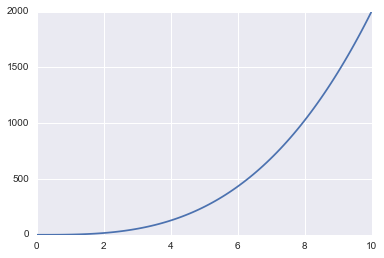

In [6]:
plt.plot(x,2*x**3)

#Pandas (Advanced 'Excel' of data science)

##Series


Think of a Pandas Series as a labeled one-dimensional vector. In fact, it need not be a numeric vector, it can contain arbitrary python objects.

In [7]:
from numpy.random import randn
import numpy as np

In [8]:
np.array(range(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
2

2

In [12]:
int_series = pd.Series(range(10))
int_series.head(100)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [13]:
num_series = pd.Series(randn(10))
num_series.head()

0    0.108639
1    1.202391
2    1.543705
3   -0.073461
4   -1.647731
dtype: float64

##Indexes
Notice how each series has an index (in this case a relatively meaningless default index).
Pandas can make great use of informative indexes. Indexes work similarly to a dictionary key, allowing fast lookups of the data associated with the index.
Indexes can also be exploited for fast group-bys, merges, time-series operations and lots more.
When you're really in the zone with pandas, you'll be thinking a lot about indexes.

In [14]:
indexed_series = pd.Series(randn(5), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky'])
alt_indexed_series = pd.Series(randn(5),
                               index = ['Washington', 'Alabama', 
                                        'Montana', 'Indiana', 
                                        'New York'])
print indexed_series
print '\n'
print alt_indexed_series

California   -0.119788
Alabama       1.032845
Indiana      -1.309851
Montana      -0.160908
Kentucky      1.255539
dtype: float64


Washington   -0.579268
Alabama      -0.170789
Montana      -1.415255
Indiana       0.457941
New York      2.017633
dtype: float64


In [15]:
indexed_series.mean()

0.1395672661370204

In [16]:
#Pandas uses the index by default to align series for arithmetic!
result = indexed_series + alt_indexed_series
print result
print result.fillna(np.mean(result))

Alabama       0.862055
California         NaN
Indiana      -0.851911
Kentucky           NaN
Montana      -1.576164
New York           NaN
Washington         NaN
dtype: float64
Alabama       0.862055
California   -0.522006
Indiana      -0.851911
Kentucky     -0.522006
Montana      -1.576164
New York     -0.522006
Washington   -0.522006
dtype: float64


In [17]:
#Datetime index
dt_index = pd.date_range('2015-1-1', 
                        '2015-11-1', 
                        freq='1 m')

In [18]:
dt_index

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='M')

##DataFrames
Data frames extend the concept of Series to table-like data.

In [19]:
df = pd.DataFrame(randn(10, 5), index=dt_index, columns=[x for x in 'abcde'])
df.tail()

,a,b,c,d,e
2015-06-30,0.593650,-0.385969,0.048673,1.078433,-0.985069
2015-07-31,0.648089,1.498250,0.984133,-1.291143,0.146413
2015-08-31,-0.974227,2.703291,-0.653278,-0.748556,-0.047706
2015-09-30,0.030964,0.412806,0.217049,0.560348,-0.157472
2015-10-31,0.543762,1.532261,-0.556394,1.325252,-0.879959


In [20]:
#A dataframes columns are series:
col = df.a
type(col)

pandas.core.series.Series

In [21]:
df['a']

2015-01-31    0.286421
2015-02-28    0.881028
2015-03-31   -0.443086
2015-04-30   -0.925340
2015-05-31   -1.847568
2015-06-30    0.593650
2015-07-31    0.648089
2015-08-31   -0.974227
2015-09-30    0.030964
2015-10-31    0.543762
Freq: M, Name: a, dtype: float64

In [22]:
#New column
df['new'] = df['a'] + df['b']
df

,a,b,c,d,e,new
2015-01-31,0.286421,0.284276,0.835994,0.493136,1.502428,0.570698
2015-02-28,0.881028,-0.572104,2.905779,1.471746,0.370217,0.308923
2015-03-31,-0.443086,-0.249279,0.387721,0.962520,1.827384,-0.692365
2015-04-30,-0.925340,-0.598408,-0.621839,0.515657,-0.424544,-1.523747
2015-05-31,-1.847568,0.657777,-0.836523,-0.614307,-0.912881,-1.189791
2015-06-30,0.593650,-0.385969,0.048673,1.078433,-0.985069,0.207681
2015-07-31,0.648089,1.498250,0.984133,-1.291143,0.146413,2.146340
2015-08-31,-0.974227,2.703291,-0.653278,-0.748556,-0.047706,1.729064
2015-09-30,0.030964,0.412806,0.217049,0.560348,-0.157472,0.443770
2015-10-31,0.543762,1.532261,-0.556394,1.325252,-0.879959,2.076022


In [27]:
#Delete a column
df.drop('new', axis=1, inplace = True)

ValueError: labels ['new'] not contained in axis

In [26]:
df.head()

,a,b,c,d,e
2015-01-31,0.286421,0.284276,0.835994,0.493136,1.502428
2015-02-28,0.881028,-0.572104,2.905779,1.471746,0.370217
2015-03-31,-0.443086,-0.249279,0.387721,0.962520,1.827384
2015-04-30,-0.925340,-0.598408,-0.621839,0.515657,-0.424544
2015-05-31,-1.847568,0.657777,-0.836523,-0.614307,-0.912881


In [28]:
df[df.index == '2015-01-31']

,a,b,c,d,e
2015-01-31,0.286421,0.284276,0.835994,0.493136,1.502428


In [31]:
df = pd.read_csv('data/playgolf.csv', delimiter='|' )
print df.head()

         Date   Outlook  Temperature  Humidity  Windy      Result
0  07-01-2014     sunny           85        85  False  Don't Play
1  07-02-2014     sunny           80        90   True  Don't Play
2  07-03-2014  overcast           83        78  False        Play
3  07-04-2014      rain           70        96  False        Play
4  07-05-2014      rain           68        80  False        Play


In [32]:
df = pd.read_csv('data/playgolf.csv', delimiter='|' )
df.head()

,Date,Outlook,Temperature,Humidity,Windy,Result
0,07-01-2014,sunny,85,85,False,Don't Play
1,07-02-2014,sunny,80,90,True,Don't Play
2,07-03-2014,overcast,83,78,False,Play
3,07-04-2014,rain,70,96,False,Play
4,07-05-2014,rain,68,80,False,Play


In [36]:
df.drop('Date',axis=1,inplace=True)

In [38]:
df2 = pd.get_dummies(df)

In [41]:
df2.drop(['Outlook_overcast','Result_Don\'t Play'],axis=1,inplace=True)

In [43]:
y = df2['Result_Play']

In [45]:
X = df2.drop('Result_Play',axis=1)

In [48]:
print X.shape, y.shape

(14, 5) (14,)


In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [50]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
rf.predict(X.values[2])

/Users/scott/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1.])

In [55]:
rf.score(X,y)

0.9285714285714286

In [56]:
rf.feature_importances_

array([ 0.30920581,  0.26586111,  0.12683754,  0.058875  ,  0.23922054])

In [53]:
df2

,Temperature,Humidity,Windy,Outlook_rain,Outlook_sunny,Result_Play
0,85,85,False,0,1,0
1,80,90,True,0,1,0
2,83,78,False,0,0,1
3,70,96,False,1,0,1
4,68,80,False,1,0,1
5,65,70,True,1,0,0
6,64,65,True,0,0,1
7,72,95,False,0,1,0
8,69,70,False,0,1,1
9,75,80,False,1,0,1


In [33]:
df.describe()

,Temperature,Humidity,Windy
count,14.000000,14.000000,14
mean,73.571429,80.285714,0.428571
std,6.571667,9.840486,0.513553
min,64.000000,65.000000,False
25%,69.250000,71.250000,0
50%,72.000000,80.000000,0
75%,78.750000,88.750000,1
max,85.000000,96.000000,True


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 5 columns):
Outlook        14 non-null object
Temperature    14 non-null int64
Humidity       14 non-null int64
Windy          14 non-null bool
Result         14 non-null object
dtypes: bool(1), int64(2), object(2)
memory usage: 574.0+ bytes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c603990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c96b1d0>]], dtype=object)

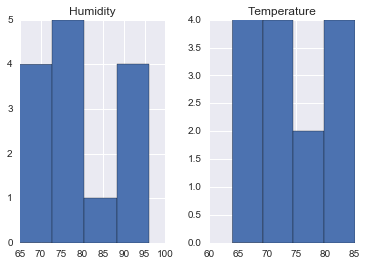

In [60]:
df.hist(['Temperature','Humidity'],bins=4)

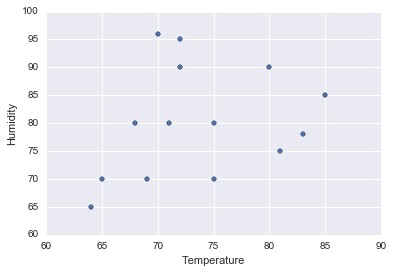

In [61]:
df.plot('Temperature', 'Humidity', kind='scatter')

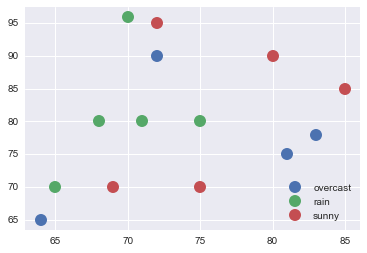

In [62]:
#for color

groups=df.groupby('Outlook')

fig, ax = plt.subplots()

ax.margins(0.05)
for name, group in groups:
    ax.plot(group.Temperature, group.Humidity, marker='o', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='lower right')

plt.show()